In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ca_san_diego_2020_04_01.csv').drop('raw_row_number', axis=1)
data

,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description
0,2014-01-01,01:25:00,110,24.0,white,male,vehicular,False,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
1,2014-01-01,05:47:00,320,42.0,white,male,vehicular,False,False,True,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,WHITE
2,2014-01-01,07:46:00,320,29.0,asian/pacific islander,male,vehicular,False,False,True,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,LAOTIAN
3,2014-01-01,08:10:00,610,23.0,white,male,vehicular,False,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
4,2014-01-01,08:35:00,930,35.0,hispanic,male,vehicular,False,True,False,citation,NaN,False,False,False,NaN,NaN,Equipment Violation,Citation,HISPANIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383022,NaN,NaN,620,NaN,NaN,NaN,vehicular,NaN,True,True,citation,NaN,False,False,False,NaN,NaN,NA|Equipment Violation|NA|NA|NA|NA|NA|Moving V...,Verbal Warning|NA|Citation|Citation|NA|NA|NA|C...,NaN
383023,NaN,NaN,710,NaN,NaN,NaN,vehicular,NaN,True,False,citation,NaN,False,False,False,NaN,NaN,NA|Moving Violation,NA|Citation,NaN
383024,2014-12-22,NaN,720,NaN,NaN,NaN,vehicular,False,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,NaN
383025,NaN,NaN,810,NaN,NaN,NaN,vehicular,NaN,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation|NA,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383027 entries, 0 to 383026
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          382844 non-null  object 
 1   time                          382292 non-null  object 
 2   service_area                  383027 non-null  object 
 3   subject_age                   371064 non-null  float64
 4   subject_race                  381793 non-null  object 
 5   subject_sex                   382366 non-null  object 
 6   type                          383027 non-null  object 
 7   arrest_made                   348284 non-null  object 
 8   citation_issued               351056 non-null  object 
 9   warning_issued                351056 non-null  object 
 10  outcome                       343855 non-null  object 
 11  contraband_found              16288 non-null   object 
 12  search_conducted              383027 non-nul

In [4]:
data.date.apply(lambda x: str(x)[8:10])

0         01
1         01
2         01
3         01
4         01
          ..
383022      
383023      
383024    22
383025      
383026      
Name: date, Length: 383027, dtype: object

In [5]:
data = data.dropna()

In [6]:
pd.set_option('display.max_columns', None)
data

,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description
80,2014-01-02,13:30:00,Unknown,25.0,hispanic,male,vehicular,False,False,True,warning,True,True,False,True,probable cause,Odor of Contraband,Moving Violation,Verbal Warning|FI,HISPANIC
127,2014-01-03,06:50:00,310,28.0,hispanic,male,vehicular,False,True,False,citation,False,True,False,True,other,Inventory Search,Moving Violation,Citation,HISPANIC
171,2014-01-03,18:50:00,810,27.0,hispanic,female,vehicular,False,True,False,citation,False,True,True,False,other,Inventory Search [Prior to Impound],Equipment Violation,Citation,HISPANIC
221,2014-01-04,07:35:00,310,36.0,white,male,vehicular,False,True,False,citation,True,True,False,True,consent,Consent Search,Equipment Violation,Citation,WHITE
295,2014-01-05,02:30:00,240,23.0,asian/pacific islander,male,vehicular,False,False,True,warning,False,True,True,False,consent,Consent Search,Equipment Violation,Verbal Warning|FI,OTHER ASIAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382251,2017-03-31,22:00:00,930,37.0,white,male,vehicular,False,True,False,citation,False,True,False,True,other,Inventory Search [Prior to Impound],Equipment Violation,Citation,WHITE
382261,2017-03-31,22:20:00,120,54.0,white,male,vehicular,False,True,False,citation,False,True,True,False,consent,Consent Search,Moving Violation,Citation,WHITE
382264,2017-03-31,22:29:00,440,47.0,black,male,vehicular,False,False,True,warning,False,True,True,True,other,-th Waiver Search,Moving Violation,Verbal Warning|FI,BLACK
382267,2017-03-31,22:30:00,120,21.0,white,male,vehicular,False,True,False,citation,False,True,True,False,consent,Consent Search,Moving Violation,Citation,WHITE


In [39]:
from datetime import datetime

data['year'] = data.date.apply(lambda x: str(x)[:4])
data['hour'] = data.time.apply(lambda x: str(x)[:2])

monthDict={'01':'Jan', '02':'Feb', '03':'Mar', '04':'Apr', '05':'May', '06':'Jun', '07':'Jul', '08':'Aug', '09':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'}
data['month#'] =  data.date.apply(lambda x: str(x)[5:7])#.replace(monthDict) #data['month'] =
data['monthName'] =  data.date.apply(lambda x: str(x)[5:7]).replace(monthDict) #data['month']
#data['dt'] = data.date.apply(lambda x: datetime(int(str(x)[:4]), int(str(x)[5:7]), int(str(x)[8:10])))
data['monthYr'] = data['month#'].map(str)+ '-' +data['year'].map(str)
data['monthYr'] = pd.to_datetime(data['monthYr'], format='%m-%Y').dt.strftime('%m-%Y')



data['hour']

127       06
171       18
221       07
295       02
326       13
          ..
382251    22
382261    22
382264    22
382267    22
382271    22
Name: hour, Length: 11154, dtype: object

In [14]:
data.service_area.value_counts()

830        1030
510         996
440         979
430         932
120         770
820         761
520         655
620         579
310         552
110         551
720         533
810         511
240         458
610         434
710         402
930         375
320         347
230         264
Unknown     193
530          19
630           4
840           1
130           1
Name: service_area, dtype: int64

<AxesSubplot:xlabel='subject_age', ylabel='Count'>

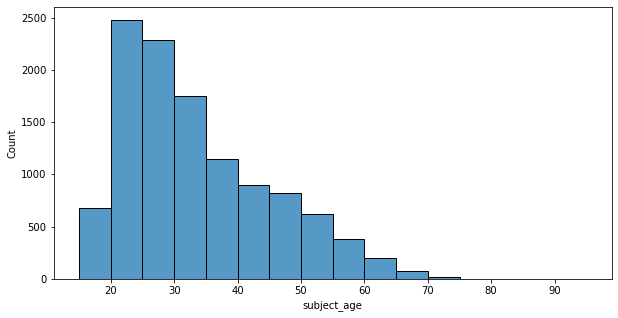

In [11]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(data=data, x='subject_age', binwidth=5)


<AxesSubplot:xlabel='subject_race', ylabel='count'>

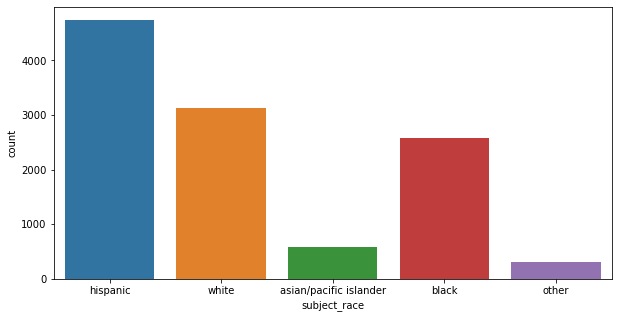

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(data=data, x='subject_race')

<AxesSubplot:xlabel='subject_sex', ylabel='count'>

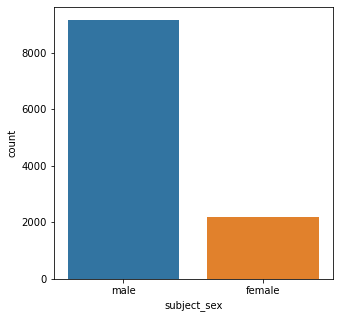

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(data=data, x='subject_sex')

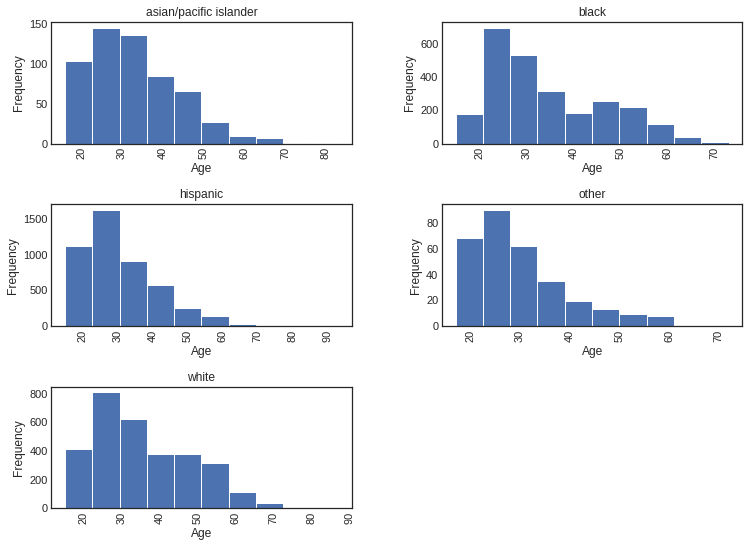

In [123]:
# Plotting the distribution of complaints for age_incident in both complainant and MOS for each MOS ethnicity
axarr = data[['subject_age']].hist(by=data['subject_race'], figsize =(12,9));
#plt.suptitle("Frequency of Age Incident in Both Complainant and Officer's for Each Officer's Ethnicity", 
#             ha='center', fontsize='xx-large');
for ax in axarr.flatten():
    ax.set_xlabel("Age")
    ax.set_ylabel("Frequency")

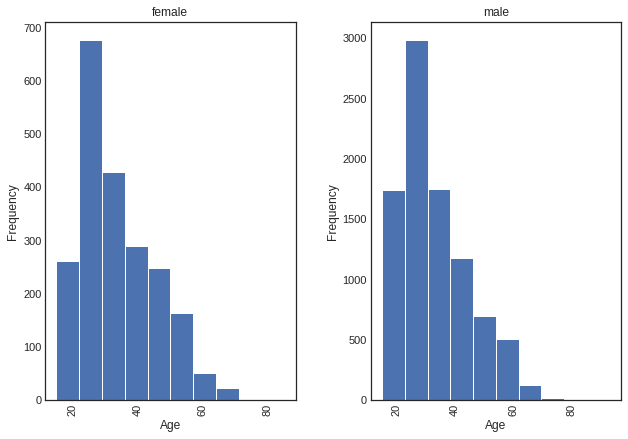

In [122]:
axarr = data[['subject_age']].hist(by=data['subject_sex'], figsize =(10,7));
#plt.suptitle("Frequency of Subject Age for Male and Female", 
#             ha='center', fontsize='x-large');
for ax in axarr.flatten():
    ax.set_xlabel("Age")
    ax.set_ylabel("Frequency")

/tmp/ipykernel_6020/3483227918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['subject_sex'] = data['subject_sex'].astype(str)


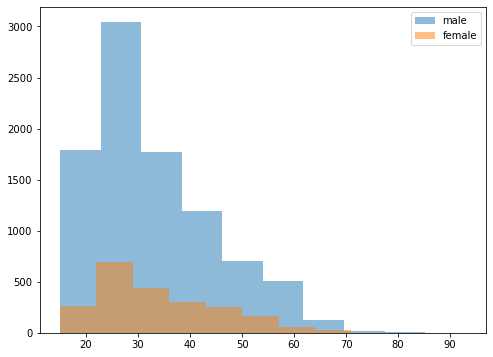

In [21]:
data['subject_sex'] = data['subject_sex'].astype(str)

# plt.hist(data[data['subject_sex'] == 'male'], 
#          label='male')
  
plt.figure(figsize=(8,6))
plt.hist(data[data['subject_sex'] == 'male'].subject_age, alpha=0.5, label="male")
plt.hist(data[data['subject_sex'] == 'female'].subject_age, alpha=0.5, label="female")
plt.legend(loc='upper right')
plt.show()

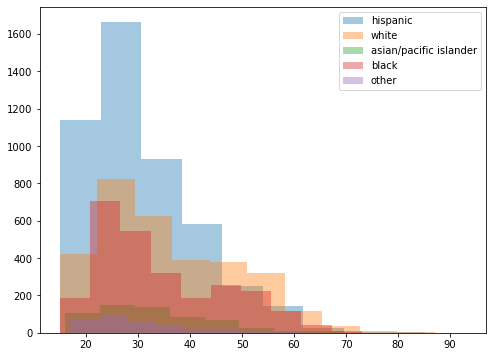

In [27]:
plt.figure(figsize=(8,6))

for race in data['subject_race'].unique():
    plt.hist(data[data['subject_race'] == race].subject_age, alpha=0.4, label=race)
# plt.hist(data[data['subject_sex'] == 'female'].subject_age, alpha=0.5, label="female")
plt.legend(loc='upper right')
plt.show()

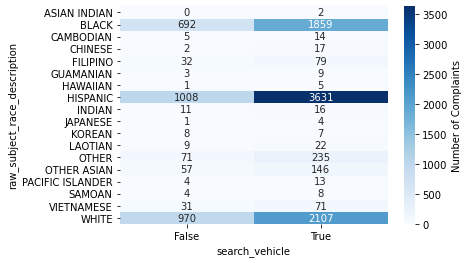

In [53]:
pivot = data.pivot_table(index = 'raw_subject_race_description', columns ='search_vehicle' ,
                       aggfunc = 'count', values = 'subject_sex').fillna(0)#.div(len(df.index)).mul(100)

ax = sns.heatmap(pivot, annot=True, cmap="Blues", fmt='g', cbar_kws={'label': 'Number of Complaints'});

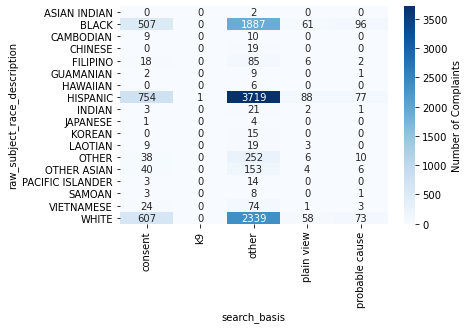

In [52]:
pivot = data.pivot_table(index = 'raw_subject_race_description', columns ='search_basis' ,
                       aggfunc = 'count', values = 'subject_sex').fillna(0)#.div(len(df.index)).mul(100)

ax = sns.heatmap(pivot, annot=True, cmap="Blues", fmt='g', cbar_kws={'label': 'Number of Complaints'});

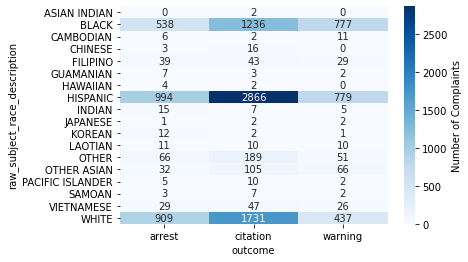

In [49]:
pivot = data.pivot_table(index = 'raw_subject_race_description', columns ='outcome' ,
                       aggfunc = 'count', values = 'subject_sex').fillna(0)#.div(len(df.index)).mul(100)

ax = sns.heatmap(pivot, annot=True, cmap="Blues", fmt='g', cbar_kws={'label': 'Number of Complaints'});

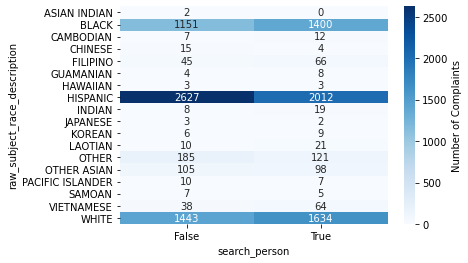

In [50]:
pivot = data.pivot_table(index = 'raw_subject_race_description', columns ='search_person' ,
                       aggfunc = 'count', values = 'subject_sex').fillna(0)#.div(len(df.index)).mul(100)

ax = sns.heatmap(pivot, annot=True, cmap="Blues", fmt='g', cbar_kws={'label': 'Number of Complaints'});

In [51]:
pivot = data.pivot_table(index = 'raw_subject_race_description', columns ='search_vehicle' ,
                       aggfunc = 'count', values = 'subject_sex').fillna(0)#.div(len(df.index)).mul(100)


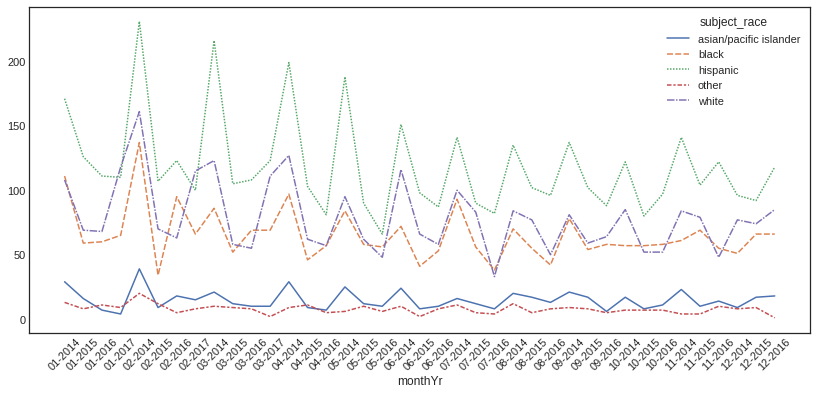

In [121]:
tmp = data.groupby(["monthYr","subject_race"]).count()['outcome'].reset_index()
pvt = tmp.pivot("monthYr", "subject_race", 'outcome')
plt.figure(figsize = (14,6))
sns.lineplot(data=pvt);
plt.xticks(rotation=45);
#plt.suptitle("Average Total Field Goal Attempts by Position Over Time (2000-2020 seasons)", y =.93, fontsize='xx-large');
#plt.xlabel("Season")
#plt.ylabel("Average Total Field Goal Point Attempts");

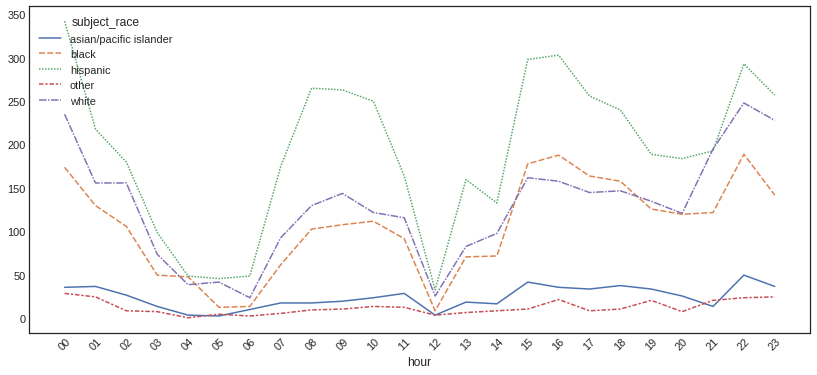

In [120]:
tmp = data.groupby(["hour","subject_race"]).count()['outcome'].reset_index()
pvt = tmp.pivot("hour", "subject_race", 'outcome')
plt.figure(figsize = (14,6))
sns.lineplot(data=pvt);
plt.xticks(rotation=45);
#plt.suptitle("Average Total Field Goal Attempts by Position Over Time (2000-2020 seasons)", y =.93, fontsize='xx-large');
#plt.xlabel("Season")
#plt.ylabel("Average Total Field Goal Point Attempts");

search_person,False,True
subject_race,,
asian/pacific islander,263,318
black,1151,1400
hispanic,2627,2012
other,185,121
white,1443,1634


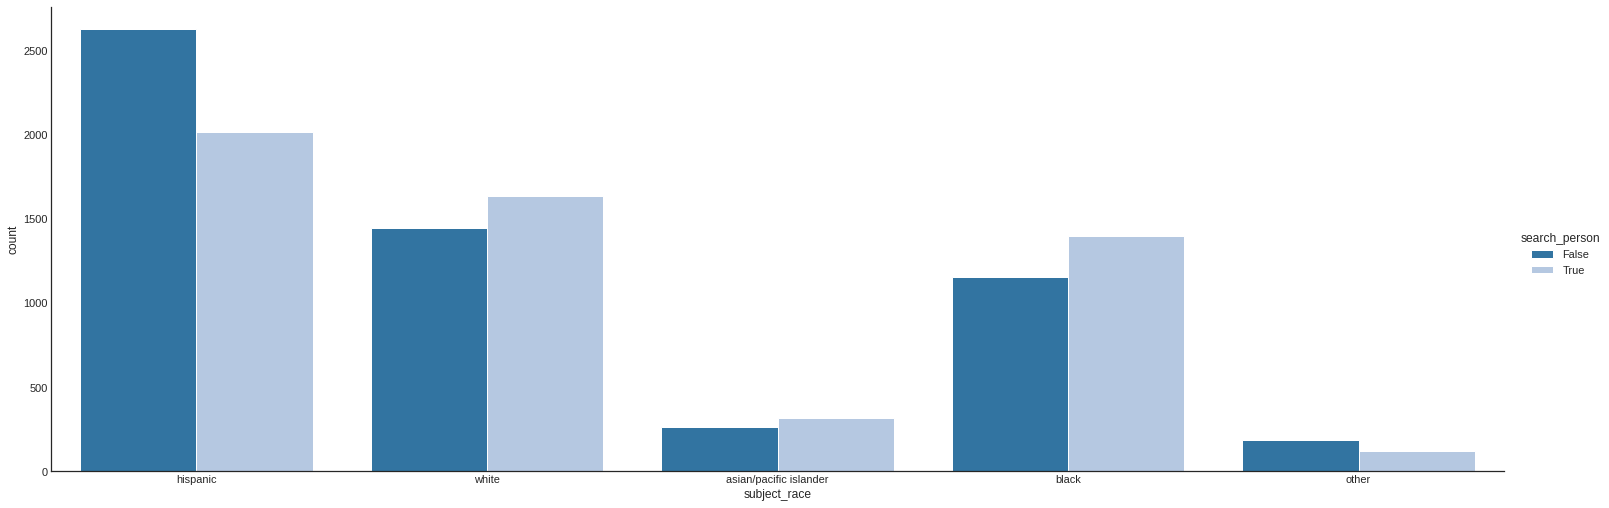

In [129]:
pivot = data.pivot_table(index = 'subject_race', columns ='search_person' ,
                       aggfunc = 'count', values = 'outcome').fillna(0)

g = sns.catplot(x='subject_race', hue="search_person", 
          data=data, palette='tab20',
            kind="count", height=7, aspect=3, orient = "h", legend = True, legend_out = True);

#plt.suptitle("Positional Distributions for Each Season (2000-2020)", y =1.05,fontsize='xx-large');
pivot

search_person,False,True
subject_sex,,
female,1360,786
male,4309,4699


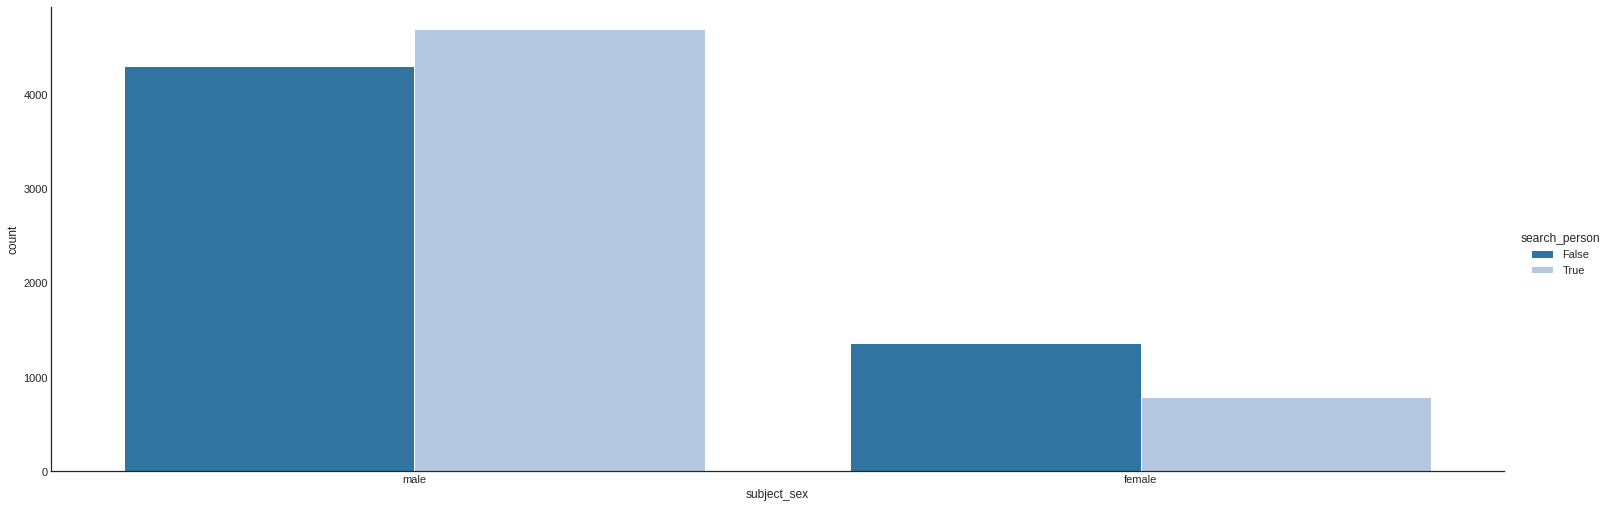

In [135]:
pivot = data.pivot_table(index = 'subject_sex', columns ='search_person' ,
                       aggfunc = 'count', values = 'outcome').fillna(0)

g = sns.catplot(x='subject_sex', hue="search_person", 
          data=data, palette='tab20',
            kind="count", height=7, aspect=3, orient = "h", legend = True, legend_out = True);

#plt.suptitle("Positional Distributions for Each Season (2000-2020)", y =1.05,fontsize='xx-large');
pivot

subject_sex,female,male
subject_race,,
asian/pacific islander,98,483
black,452,2099
hispanic,844,3795
other,51,255
white,701,2376


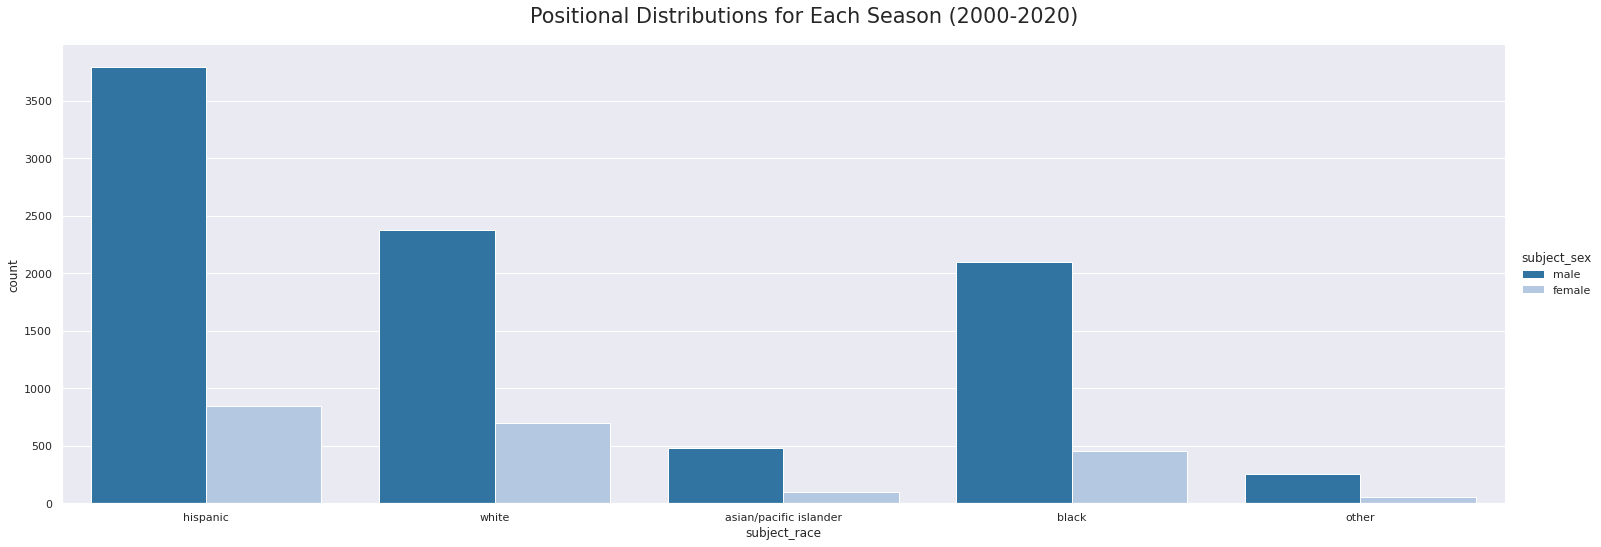

In [56]:
pivot = data.pivot_table(index = 'subject_race', columns ='subject_sex' ,
                       aggfunc = 'count', values = 'outcome').fillna(0)

g = sns.catplot(x='subject_race', hue="subject_sex", 
          data=data, palette='tab20',
            kind="count", height=7, aspect=3, orient = "h", legend = True, legend_out = True);

plt.suptitle("Positional Distributions for Each Season (2000-2020)", y =1.05,fontsize='xx-large');
pivot

subject_race,asian/pacific islander,black,hispanic,other,white
year,,,,,
2014,273,997,1928,119,1241
2015,147,647,1199,90,811
2016,132,707,1179,78,681
2017,29,200,333,19,344


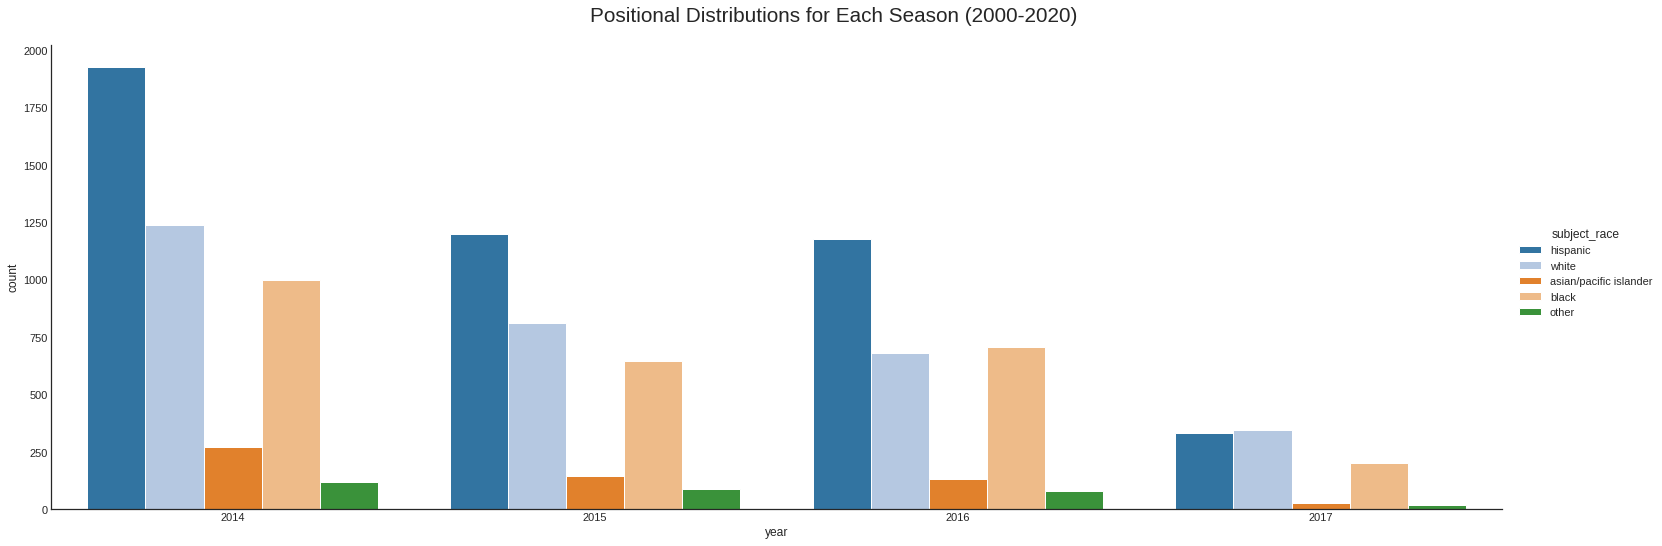

In [130]:
pivot = data.pivot_table(index = 'year', columns ='subject_race' ,
                       aggfunc = 'count', values = 'outcome').fillna(0)

g = sns.catplot(x='year', hue="subject_race", 
          data=data, palette='tab20',
            kind="count", height=7, aspect=3, orient = "h", legend = True, legend_out = True);

plt.suptitle("Positional Distributions for Each Season (2000-2020)", y =1.05,fontsize='xx-large');
pivot

In [44]:
!pip install geoplot

Defaulting to user installation because normal site-packages is not writeable
  Using cached geoplot-0.5.1-py3-none-any.whl (28 kB)
  Using cached Cartopy-0.20.2.tar.gz (10.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  ERROR: Command errored out with exit status 1:
   command: /opt/conda/bin/python3.9 /opt/conda/lib/python3.9/site-packages/pip/_vendor/pep517/in_process/_in_process.py get_requires_for_build_wheel /tmp/tmp2qjfjvqr
       cwd: /tmp/pip-install-lu4wflij/cartopy_a1c5fd0746134aa285ca5efe0da00388
  Complete output (3 lines):
  setup.py:117: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
    warnings.warn(
  Proj 8.0.0 must be installed.
  ----------------------------------------
  Using cached Cartopy-0.20.1.tar.gz (10.8 MB)
  Installing build dependencies ... /^C
anceled
ERROR: Operation cancelled by user


<AxesSubplot:>

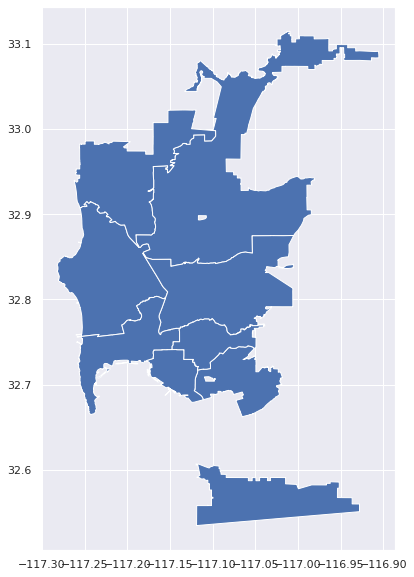

In [51]:
# Import the geopandas and geoplot libraries
import geopandas as gpd
#import geoplot as gplt

# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/matin-g/geodata/main/pd_divisions_datasd.topojson')

# # Make sure the "id" column is an integer
#geoData.id = geoData.id.astype(str).astype(int)


# # Basic plot with just county outlines
# gplt.polyplot(geoData, figsize=(20, 4));
geoData.plot()

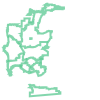

In [55]:
import topojson as tp
# compute the topology
topo = tp.Topology(geoData)  

# apply simplification on the topology and render as SVG
topo.to_svg()

In [56]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [57]:
import numpy as np
import pandas as pd
import folium
import json

geoData = gpd.read_file('https://raw.githubusercontent.com/matin-g/geodata/main/pd_divisions_datasd.topojson')


In [62]:
folium_map = folium.Map(location=[19, 80],
                        zoom_start=4,
                        tiles="CartoDB dark_matter")
# folium.Choropleth(geo_data=states_topo,
#              topojson='objects.India_States_2020_compressed',
#              key_on='feature.properties.state_name',
#              data=df, # my dataset
#              columns=['st_nm','count'], 
#              fill_color='GnBu', 
#              fill_opacity=0.7, 
#              line_opacity=0.5).add_to(folium_map)

folium.Choropleth(geo_data=geoData,

             fill_color='GnBu', 
             fill_opacity=0.7, 
             line_opacity=0.5).add_to(folium_map)

folium_map


ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

In [63]:
import shapefile as shp

ModuleNotFoundError: No module named 'shapefile'

In [65]:
!pip install pyshp

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 44 kB 1.6 MB/s eta 0:00:01


In [8]:
import shapefile as shp
#shp_path = "./pd_neighborhoods_datasd/pd_neighborhoods_datasd.shp"

In [20]:
shp_path = "./ca_san_diego_shapefiles/divisions_datasd.shp"
shp_path = "./pd_neighborhoods_datasd/pd_neighborhoods_datasd.shp"
sf = shp.Reader(shp_path)


In [21]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

df = read_shapefile(sf)
df.shape

(124, 3)

In [22]:
df


,objectid,name,coords
0,1,MIRAMAR RANCH NORTH,"[(6299129.000043392, 1925775.9991539717), (629..."
1,2,TORREY HIGHLANDS,"[(6279516.94215472, 1928760.3330803066), (6279..."
2,3,MISSION BAY,"[(6252821.93813014, 1856536.741963476), (62528..."
3,4,NORTH CITY,"[(6257720.253136635, 1939882.555914566), (6257..."
4,5,LOMA PORTAL,"[(6264112.99888131, 1853859.999941647), (62643..."
...,...,...,...
119,120,CLAIREMONT MESA WEST,"[(6277839.998986304, 1872630.0001312345), (627..."
120,121,BIRDLAND,"[(6283884.0000216365, 1864869.9999032319), (62..."
121,122,MIRAMAR,"[(6295761.140965477, 1908441.071881637), (6295..."
122,123,KEARNY MESA,"[(6292001.323353887, 1887162.4776278883), (629..."


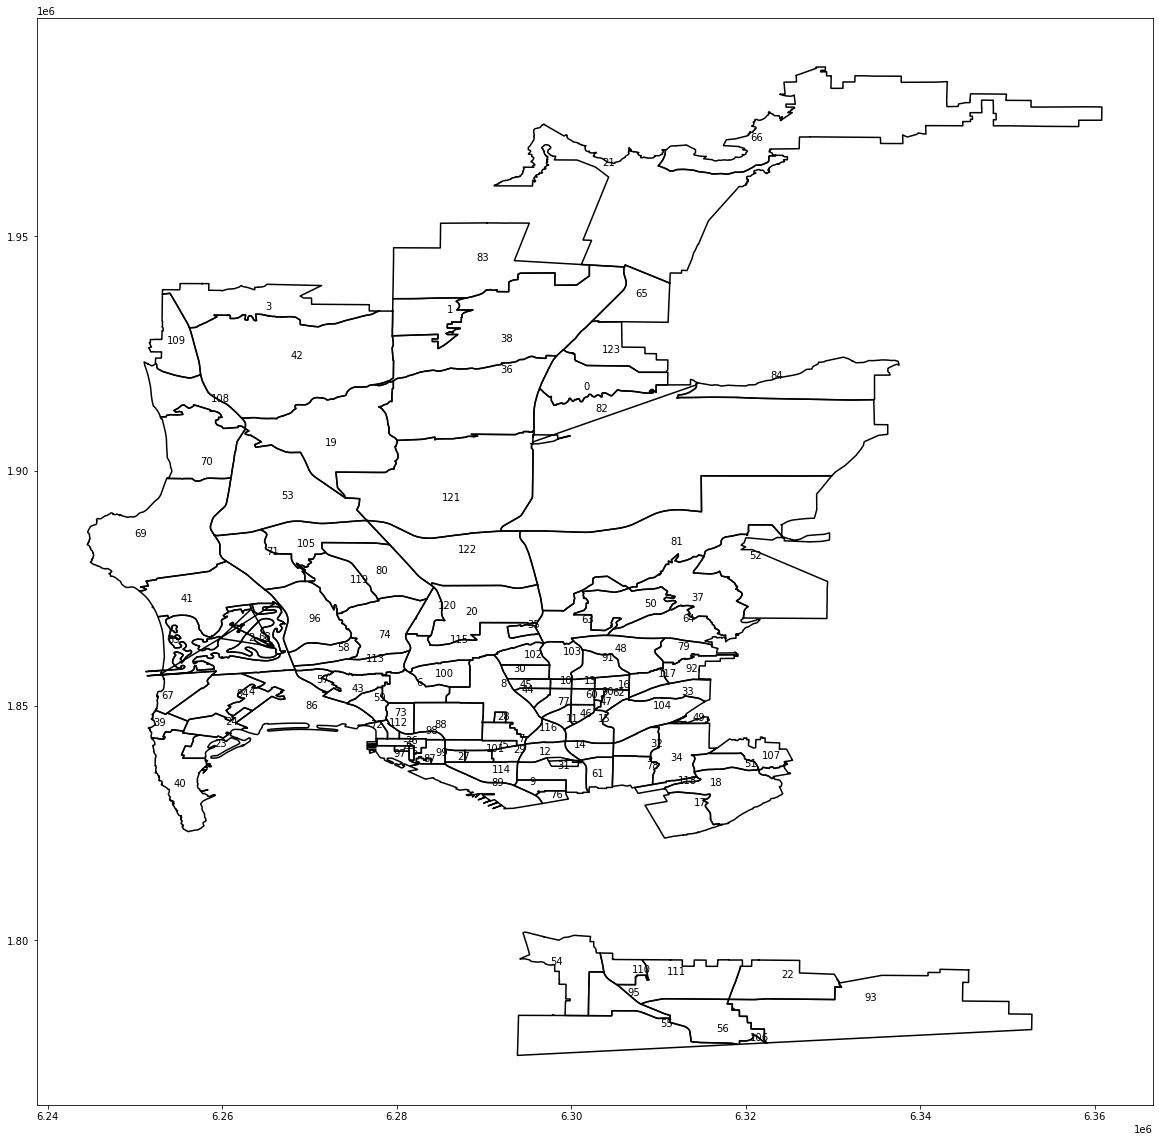

In [23]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (20,20)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

plot_map(sf)

In [36]:
sf.shape(id)

NameError: name 'objectid' is not defined

IndexError: Shape or Record index out of range.

<Figure size 792x648 with 0 Axes>

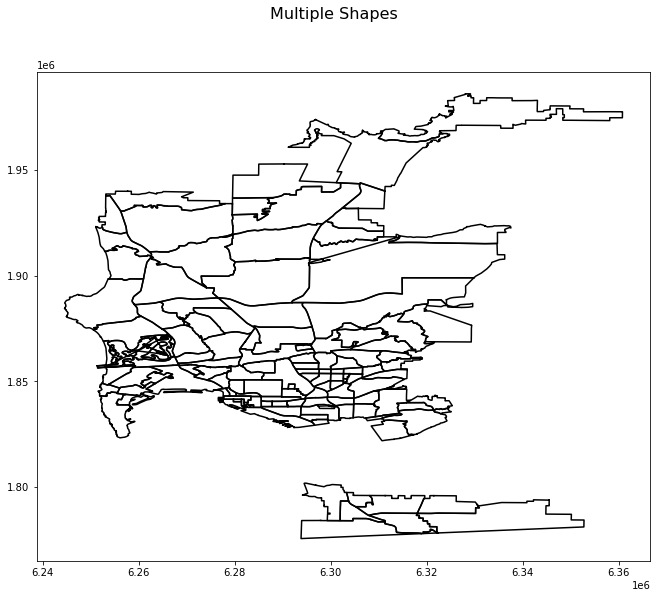

In [37]:
def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

data.service_area = data.service_area[data['service_area'] != 'Unknown']    
data = data.dropna()

plot_map_fill_multiples_ids("Multiple Shapes", 
                            data.service_area.astype('int'), sf, color = 'r')

In [62]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [84]:
from parity.fairness_metrics import show_bias

data.subject_race = data.subject_race.astype('str')

data['Race-White'] = data.subject_race(lambda x: True if x == 'white' else False)

priv_category = 'Race-White'
priv_value = 'True'
target_label = 'arrest_made'
unencoded_target_label = 'True'
cols_to_drop = ''

show_bias(data, priv_category, priv_value, target_label, unencoded_target_label, cols_to_drop)

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

In [82]:
!pip install numpy==1.21.1

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 15.8 MB 11.9 MB/s eta 0:00:01    |██████████████████████████████  | 14.8 MB 11.9 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.0
    Uninstalling numpy-1.20.0:
      Successfully uninstalled numpy-1.20.0
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.1 which is incompatible.


In [86]:
!pip install parity

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement parity (from versions: none)
ERROR: No matching distribution found for parity


In [88]:
from parity import pair


ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

In [89]:
!pip install sklego

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 223 kB 13.9 MB/s eta 0:00:01
     |████████████████████████████████| 48 kB 6.3 MB/s  eta 0:00:01
     |████████████████████████████████| 88 kB 7.4 MB/s  eta 0:00:01
     |████████████████████████████████| 829 kB 27.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 39.8 MB/s eta 0:00:01
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=4c70f7419bcb72970d512571bfe6006be434b53ab1e1c62766d19d7c4e9c3c93
  Stored in directory: /tmp/xdg-cache/pip/wheels/2f/a0/d3/4030d9f80e6b3be787f19fc911b8e7aa462986a40ab1e4bb94
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82820 sha256=55c41a62e6569df34d19494194d5fe23d23e5058e91c5741962a03c803c50e3d
  Stored in directory: /tmp/xdg-cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndesce

In [119]:
from sklego.metrics import equal_opportunity_score
from sklearn.linear_model import LogisticRegression
import types

df = pd.DataFrame()

df['Race-White'] = data.subject_race.apply(lambda x: 1 if x == 'white' else 0)
df['Race-Black'] = data.subject_race.apply(lambda x: 1 if x == 'black' else 0)
#df['Race-hispanic'] = data.subject_race(lambda x: 1 if x == 'hispanic' else 0)
df['arrest-made'] = data.arrest_made.apply(lambda x: 1 if x == True else 0)

X, y = df.drop(columns='arrest-made'), df['arrest-made']

mod_1 = types.SimpleNamespace()

mod_1.predict = lambda X: df['Race-White'].to_numpy()
print('equal_opportunity_score:', equal_opportunity_score(sensitive_column="Race-Black")(mod_1, X, y))

mod_1.predict = lambda X: df['Race-White'].to_numpy()
print('equal_opportunity_score:', equal_opportunity_score(sensitive_column="Race-Black")(mod_1, X, y))

mod_1.predict = lambda X: df['Race-White'].to_numpy()

print('equal_opportunity_score:', equal_opportunity_score(sensitive_column="Race-Black")(mod_1, X, y))


equal_opportunity_score: 0.0
equal_opportunity_score: 0.0
equal_opportunity_score: 0.0


divide by zero encountered in double_scalars


In [92]:
df['Race-White'] = data.subject_race.apply(lambda x: 1 if x == 'white' else 0)

In [93]:
mod_1 = types.SimpleNamespace()

mod_1.predict = lambda X: df['Race-White'].to_numpy()

In [100]:
data.subject_race.apply(lambda x: 1 if x is True else 0)

127       0
171       0
221       0
295       0
326       0
         ..
382251    0
382261    0
382264    0
382267    0
382271    0
Name: subject_race, Length: 11154, dtype: int64

In [102]:
data.arrest_made

127       False
171       False
221       False
295       False
326        True
          ...  
382251    False
382261    False
382264    False
382267    False
382271    False
Name: arrest_made, Length: 11154, dtype: object

In [103]:
df

,Race-White,Race-Black,arrest-made
127,0,0,0
171,0,0,0
221,1,0,0
295,0,0,0
326,0,1,1
...,...,...,...
382251,1,0,0
382261,1,0,0
382264,0,1,0
382267,1,0,0


In [104]:
df['Race-White'].to_numpy()

array([0, 0, 1, ..., 0, 1, 1])

In [107]:
from sklego.metrics import p_percent_score
from sklearn.linear_model import LogisticRegression

mod_unfair = LogisticRegression(solver='lbfgs').fit(X, y)

print('p_percent_score:', p_percent_score(sensitive_column="Race-Black")(mod_unfair, X))

p_percent_score: 0


No samples with y_hat == 1 for Race-Black == 1, returning 0


,Race-White,Race-Black
127,0,0
171,0,0
221,1,0
295,0,0
326,0,1
...,...,...
382251,1,0
382261,1,0
382264,0,1
382267,1,0


In [115]:
!pip install fairlens

Defaulting to user installation because normal site-packages is not writeable
  Using cached fairlens-0.1.0-py3-none-any.whl (36 kB)
  Using cached dcor-0.5.3-py2.py3-none-any.whl (35 kB)
  Using cached pyemd-0.5.1.tar.gz (91 kB)
  ERROR: Command errored out with exit status 1:
   command: /opt/conda/bin/python3.9 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-inc5srw6/pyemd_67e324fdd92a4220bd7f5b7f9ac429a4/setup.py'"'"'; __file__='"'"'/tmp/pip-install-inc5srw6/pyemd_67e324fdd92a4220bd7f5b7f9ac429a4/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-ck9z9wga
       cwd: /tmp/pip-install-inc5srw6/pyemd_67e324fdd92a4220bd7f5b7f9ac429a4/
  Complete output (16 lines):
  running bdist_wheel
  running build

In [114]:
import fairlens as fl
# Automatically generate a report
fscorer = fl.FairnessScorer(
    data,
    target_attribute="RawScore",
    sensitive_attributes=[
        "subject_sex",
        "subject_race"
    ]
)
fscorer.demographic_report()


ModuleNotFoundError: No module named 'fairlens'